<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Alineamiento de una lámina de cuarto de onda </font>
</div>

Es necesario encontrar un método para encontrar el eje rápido de una lámina de cuarto de onda sin necesitar otra lámina de cuarto de onda ya calibrada.

In [3]:
from py_pol.jones_matrix import Jones_matrix, Jones_vector, degrees
from diffractio import degrees, mm, nm, um
from diffractio import np, plt, sp
from matplotlib.patches import Rectangle

# Método 1

El metodo uno consiste en un interferómetro de Mach-Zehnder donde en cada brazo se genera una polarización lineal diferente. A la salida del interferómetro se coloca el retardador que se quiere medir (lámina de cuarto de onda, por ejemplo), y un polarizador de medida. El esquema se puede ver en la figura.

<img src="Metodo 1.png" /> 

## Parametros perfectos

In [110]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 157.5*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind <= Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.legend(legend, loc=1)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Caso ideal", fontsize = 25)
plt.xlabel("X (px)", fontsize = 25)
plt.ylabel("Intensidad (u.a.)", fontsize = 25)
plt.ylim((0,2))
plt.xlim((0,720))

I0 = I[:,0]
If = I[:,4]
x_min = np.array(np.where(I0 == np.min(I0)))[0]
x_max = np.array(np.where(If == np.min(If)))[0][0]
print(x_max)
plt.gca().add_patch(Rectangle((x_min,0),x_max-x_min,2, alpha=0.5))

270


In [ ]:
for i in range (len(I[0,:])): 
    im_intensity = np.tile(I[:,i],(100,1))
    plt.figure()
    plt.imshow(im_intensity, cmap='Greys')
    plt.axis('off')
    plt.clim(0,2)
    #plt.savefig('Caso_0_{}.png'.format(i), bbox_inches='tight',pad_inches = 0)

El resultado es perfecto. El máximo de más a la izquierda corresponde al acimut de 0º y el de más a la derecha al acimut de 90º, por lo que podemos diferenciar fácilmente cual es el eje rápido del lento.

Y si en lugar de 45º usamos 135º:

In [8]:
Nfases = 2
Nangles = 9
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=135*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.xlabel("X (px)")
    plt.ylabel("Intensidad (u.a.)")
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)

plt.title("Distribución de intensidad: Caso 0", fontsize = 25)
plt.xlabel("X (px)", fontsize = 25)
plt.ylabel("Intensidad (u.a.)", fontsize = 25)

Text(0, 0.5, 'Intensidad (u.a.)')

In [ ]:
for i in range (len(I[0,:])): 
    im_intensity = np.tile(I[:,i],(100,1))
    plt.figure()
    plt.imshow(im_intensity, cmap='Greys')
    plt.axis('off')
    plt.clim(0,2)
    #plt.savefig('Caso_1_{}.png'.format(i), bbox_inches='tight',pad_inches = 0)

Hay un desplazamiento de las franjas para todos los ángulos, lo cual no nos importa.

## Desviacion de los parametros perfectos

### Error en el angulo del polarizador de un brazo

In [113]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 157.5*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=80*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=135*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind <= Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    
    plt.legend(legend, loc=1)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Distribución de intensidad: Caso 1", fontsize = 25)
plt.xlabel("X (px)", fontsize = 25)
plt.ylabel("Intensidad (u.a.)", fontsize = 25)
plt.ylim((0,2))
plt.xlim((0,720))

I0 = I[:,0]
If = I[:,4]
x_min = np.array(np.where(I0 == np.min(I0)))[0]
x_max = np.array(np.where(If == np.min(If)))[0][0]
print(x_max)
plt.gca().add_patch(Rectangle((x_min,0),200,2, alpha=0.5))

100


No es un problema ya que el maximo de más a la izquierda sigue siendo el de acimut de 90º y el de 0º el de la derecha, con los demás en medio.

In [ ]:
for i in range (len(I[0,:])): 
    im_intensity = np.tile(I[:,i],(100,1))
    plt.figure()
    plt.imshow(im_intensity, cmap='Greys')
    plt.axis('off')
    plt.clim(0,2)
    #plt.savefig('Caso_1_{}.png'.format(i), bbox_inches='tight',pad_inches = 0)

### Error en el angulo del polariador de medida

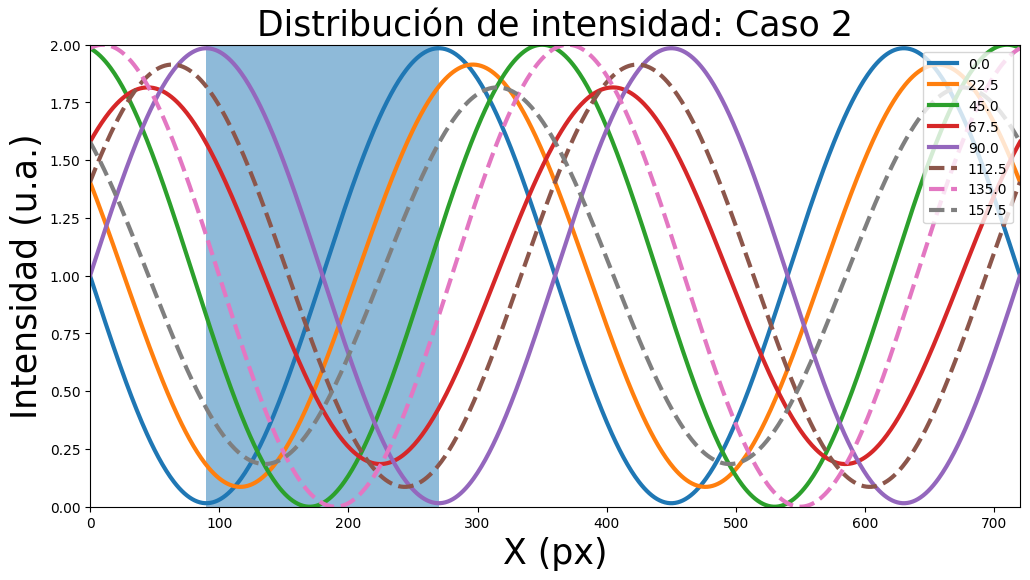

In [115]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 157.5*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=50*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind <= Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    
    plt.legend(legend, loc=1)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Distribución de intensidad: Caso 2", fontsize=25)
plt.xlabel("X (px)", fontsize=25)
plt.ylabel("Intensidad (u.a.)", fontsize=25)
plt.ylim((0,2))
plt.xlim((0,720))
I0 = I[:,0]
If = I[:,4]
x_min = np.array(np.where(I0 == np.min(I0)))[0][0]
x_max = np.array(np.where(If == np.min(If)))[0][0]
plt.gca().add_patch(Rectangle((x_min,0),x_max-x_min,2, alpha=0.5))

In [ ]:
for i in range (len(I[0,:])): 
    im_intensity = np.tile(I[:,i],(100,1))
    plt.figure()
    plt.imshow(im_intensity, cmap='Greys')
    plt.axis('off')
    plt.clim(0,2)
    #plt.savefig('Caso_2_{}.png'.format(i), bbox_inches='tight',pad_inches = 0)

Sigue valiendo, simplemente se desdoblan algunas curvas que antes se superponían.

### Retardancia diferente de $\lambda/4$

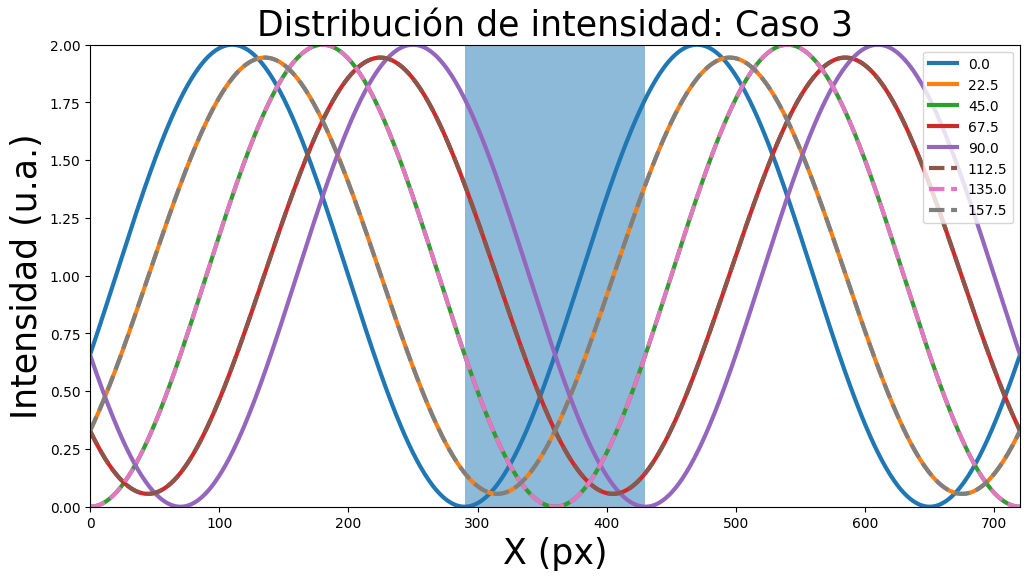

In [116]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 157.5*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=70*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=135*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind <= Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.legend(legend, loc=1)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Distribución de intensidad: Caso 3", fontsize=25)
plt.xlabel("X (px)", fontsize=25)
plt.ylabel("Intensidad (u.a.)", fontsize=25)
plt.ylim((0,2))
plt.xlim((0,720))

I0 = I[:,0]
If = I[:,4]
x_min = np.array(np.where(I0 == np.min(I0)))[0][0]
x_max = np.array(np.where(If == np.min(If)))[0][0]
plt.gca().add_patch(Rectangle((x_min,0),x_max-x_min,2, alpha=0.5))

In [ ]:
for i in range (len(I[0,:])): 
    im_intensity = np.tile(I[:,i],(100,1))
    plt.figure()
    plt.imshow(im_intensity, cmap='Greys')
    plt.axis('off')
    plt.clim(0,2)
    #plt.savefig('Caso_3_{}.png'.format(i), bbox_inches='tight',pad_inches = 0)

Sigue valiendo, solo cambia la diferencia de altura y los máximos se juntan.

### Polarizadores no ideales

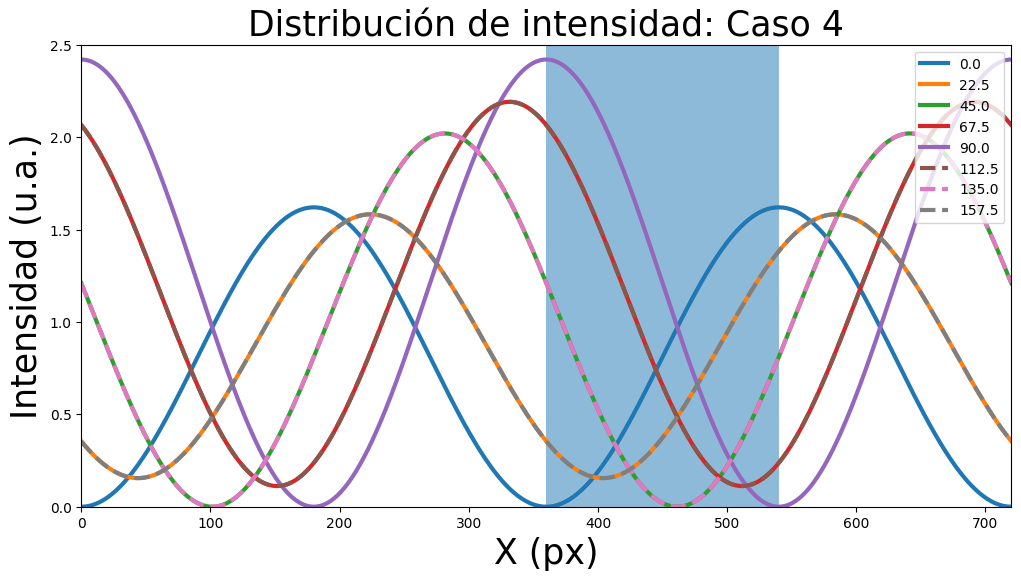

In [119]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 157.5*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E0 = Jones_vector().circular_light(intensity=2)

E1 = Jones_matrix().diattenuator_linear(p2=0.1, azimuth=90*degrees) * E0
E2 = Jones_matrix().diattenuator_linear(p2=0.1, azimuth=0*degrees) * E0.add_global_phase(Fase)

E = E1 + E2

Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_linear(p2=0, azimuth=135*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind <= Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    
    
    plt.legend(legend, loc=1)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Distribución de intensidad: Caso 4", fontsize = 25)
plt.xlabel("X (px)", fontsize = 25)
plt.ylabel("Intensidad (u.a.)", fontsize = 25)
plt.xlim((0,720))
plt.ylim((0,2.5))

I0 = I[:,0]
If = I[:,4]
x_min = np.array(np.where(I0 == np.min(I0)))[0][0]
x_max = np.array(np.where(If == np.min(If)))[0][0]
plt.gca().add_patch(Rectangle((360,0),x_max-x_min,2.5, alpha=0.5))

In [ ]:
for i in range (len(I[0,:])): 
    im_intensity = np.tile(I[:,i],(100,1))
    plt.figure()
    plt.imshow(im_intensity, cmap='Greys')
    plt.axis('off')
    plt.clim(0,I.max())
    plt.savefig('Caso_4_{}.png'.format(i), bbox_inches='tight',pad_inches = 0)

Las franjas tendrán difeente visibilidad, pero el método sigue funcionando.

### Los autoestados del retardador no son lineales

[[450]]


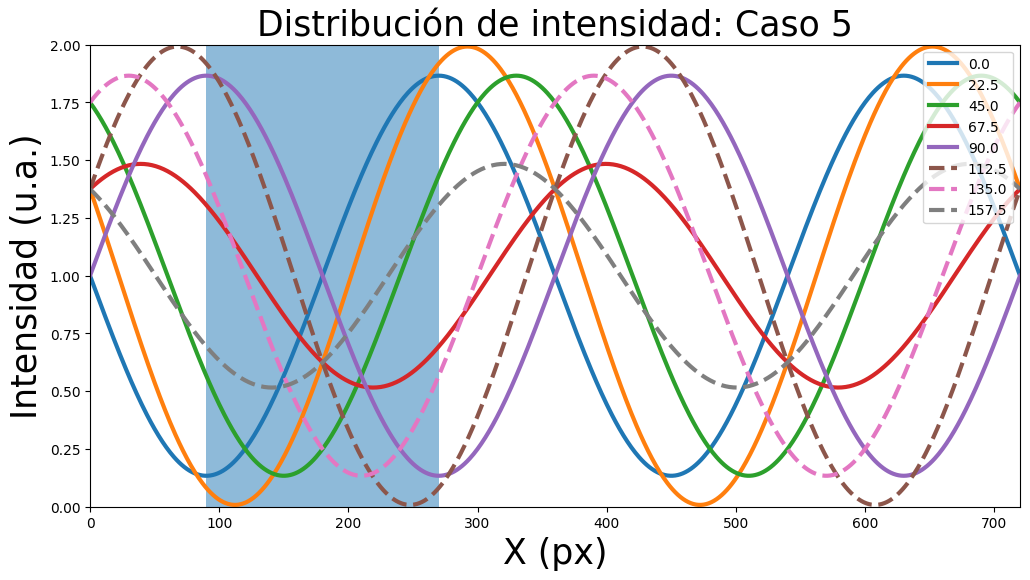

In [120]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 157.5*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_azimuth_ellipticity(R=90*degrees, azimuth=Angles, ellipticity=15*degrees)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind <= Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    
    
    plt.legend(legend, loc=1)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Distribución de intensidad: Caso 5", fontsize=25)
plt.xlabel("X (px)", fontsize=25)
plt.ylabel("Intensidad (u.a.)", fontsize=25)
plt.xlim((0,720))
plt.ylim((0,2))

I0 = I[:,0]
If = I[:,4]
x_min = np.array(np.where(I0 == np.min(I0)))
print(x_min)
x_max = np.array(np.where(If == np.min(If)))[0][0]
plt.gca().add_patch(Rectangle((90,0),180,2, alpha=0.5))

In [ ]:
for i in range (len(I[0,:])): 
    im_intensity = np.tile(I[:,i],(100,1))
    plt.figure()
    plt.imshow(im_intensity, cmap='Greys')
    plt.axis('off')
    plt.clim(0,2)
    plt.savefig('Caso_6_{}.png'.format(i), bbox_inches='tight',pad_inches = 0)

Increible, pero parece que sigue valiendo prácticamente hasta que son circulares.

## Conclusión

Método válido aunque hay que tener cuidado con el signo de la fase global.

Text(0, 0.5, 'Intensidad (u.a.)')

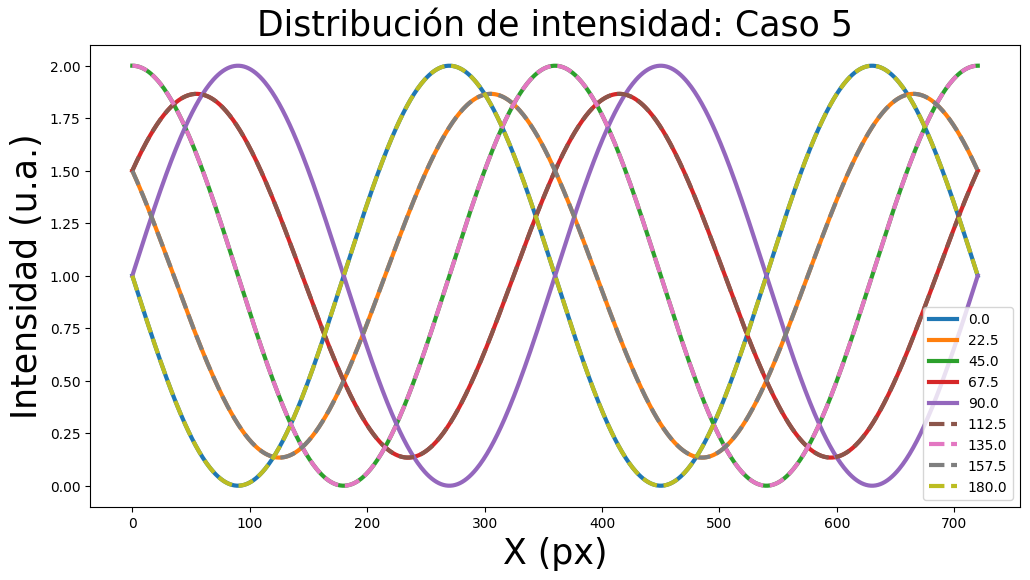

In [21]:
# Metodo 1
Nfases = 2
Nangles = 9
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_azimuth_ellipticity(R=90*degrees, azimuth=Angles, ellipticity=0*degrees)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    
    
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Distribución de intensidad: Caso 5", fontsize=25)
plt.xlabel("X (px)", fontsize=25)
plt.ylabel("Intensidad (u.a.)", fontsize=25)

Text(0, 0.5, 'Intensidad (u.a.)')

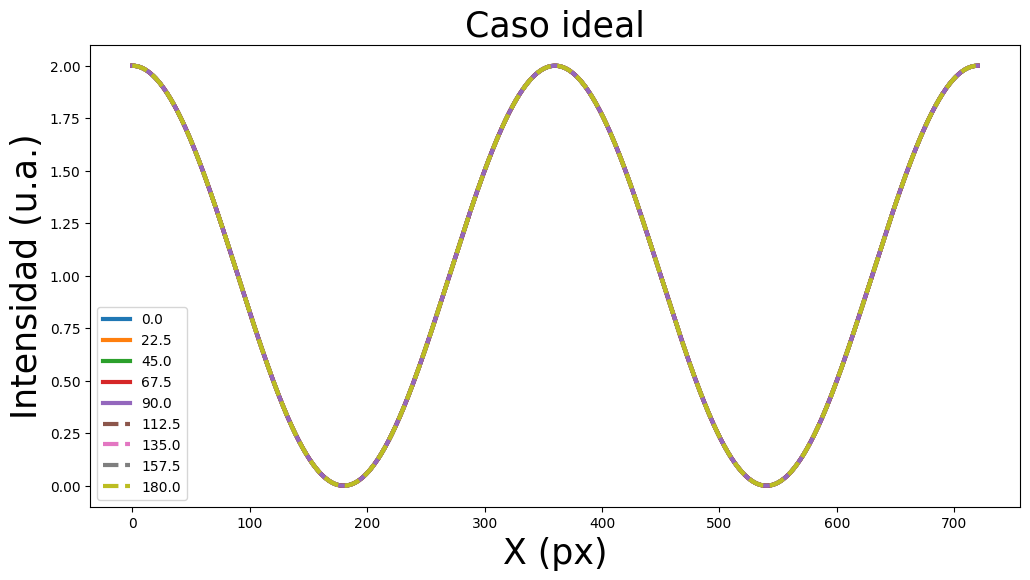

In [37]:
# Metodo 1
Nfases = 2
Nangles = 9
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=360*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Caso ideal", fontsize = 25)
plt.xlabel("X (px)", fontsize = 25)
plt.ylabel("Intensidad (u.a.)", fontsize = 25)


Text(0, 0.5, 'Intensidad (u.a.)')

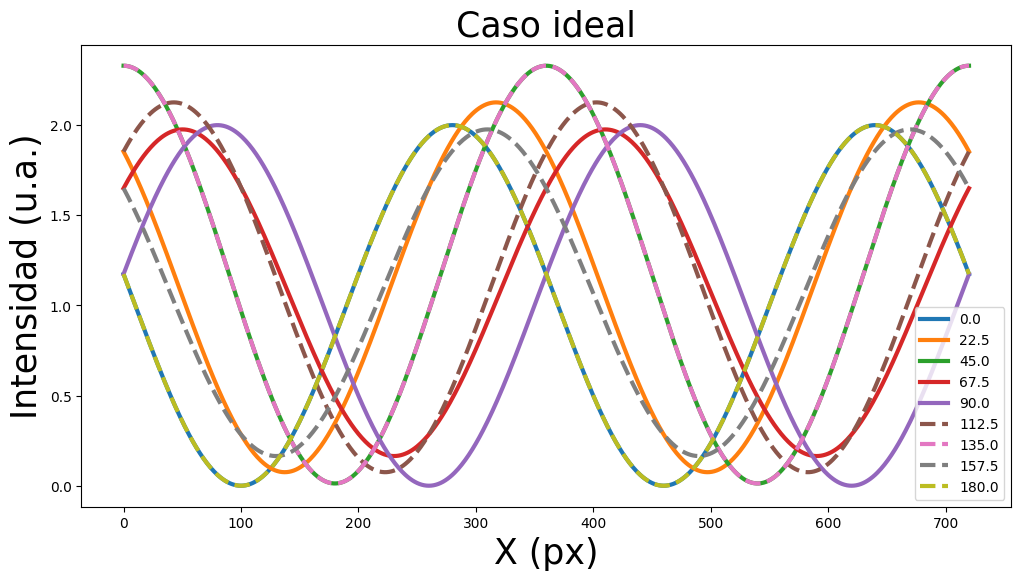

In [4]:
# Metodo 1
Nfases = 2
Nangles = 9
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=80*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Caso ideal", fontsize = 25)
plt.xlabel("X (px)", fontsize = 25)
plt.ylabel("Intensidad (u.a.)", fontsize = 25)
